In [3]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

In [4]:
x,y=mglearn.datasets.make_forge()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


shape:
(26, 2)
shape:
(26,)


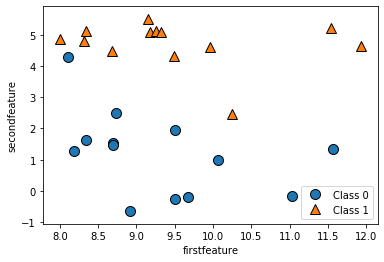

In [5]:
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("firstfeature")
plt.ylabel("secondfeature")
print("shape:\n{}".format(x.shape))
print("shape:\n{}".format(y.shape))

shape:
(50, 1)
shape:
(50,)


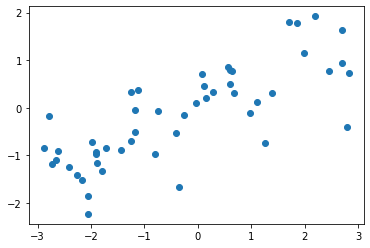

In [6]:
x,y=mglearn.datasets.make_wave(n_samples=50)
plt.plot(x,y,'o')
print("shape:\n{}".format(x.shape))
print("shape:\n{}".format(y.shape))

In [7]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [8]:
print("shape:\n{}".format(cancer.data.shape))
print("shape:\n{}".format(cancer.target.shape))

shape:
(569, 30)
shape:
(569,)


In [9]:
print("sample counts per class :\n{}".format({n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}))

sample counts per class :
{'malignant': 212, 'benign': 357}


In [10]:
from sklearn.datasets import load_boston
boston=load_boston()

In [11]:
print("shape:\n{}".format(boston.data.shape))

shape:
(506, 13)


In [12]:
x,y=mglearn.datasets.load_extended_boston()
print("shape:\n{}".format(x.shape))
print("shape:\n{}".format(y.shape))

shape:
(506, 104)
shape:
(506,)


In [13]:
from sklearn.model_selection import train_test_split
x,y=mglearn.datasets.make_forge()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train,y_train)
print("TEST RESULT:\n{:.2f}".format(clf.score(x_test,y_test)))

TEST RESULT:
0.86


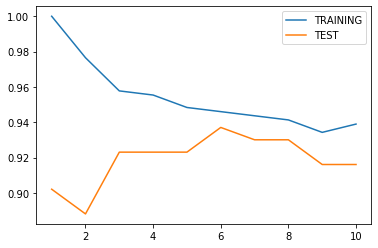

In [15]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
train_acc=[]
test_acc=[]
nei=range(1,11)
for n in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train,y_train)
    train_acc.append(clf.score(x_train,y_train))
    test_acc.append(clf.score(x_test,y_test))
plt.plot(nei,train_acc,label="TRAINING")
plt.plot(nei,test_acc,label="TEST")
plt.legend()

In [16]:
from sklearn.neighbors import KNeighborsRegressor
x,y=mglearn.datasets.make_wave()

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90)
reg=KNeighborsRegressor(n_neighbors=1)
reg.fit(x_train,y_train)
print("RESULT:\n{:.2f}".format(reg.score(x_test,y_test)))
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train,y_train)
print("RESULT:\n{:.2f}".format(reg.score(x_test,y_test)))
reg=KNeighborsRegressor(n_neighbors=9)
reg.fit(x_train,y_train)
print("RESULT:\n{:.2f}".format(reg.score(x_test,y_test)))

RESULT:
0.73
RESULT:
0.71
RESULT:
0.68


In [21]:
from sklearn.linear_model import LinearRegression
x,y=mglearn.datasets.make_wave()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2)
reg=LinearRegression().fit(x_train,y_train)
print("weights:\n{}".format(reg.coef_))
print("intercepts:\n{}".format(reg.intercept_))

weights:
[0.40270539]
intercepts:
0.024792492046031397


In [22]:
print("Result:\n{:.2f}".format(reg.score(x_test,y_test)))
print("Result:\n{:.2f}".format(reg.score(x_train,y_train)))


Result:
0.69
Result:
0.60


In [24]:
x,y=mglearn.datasets.load_extended_boston()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2)
reg=LinearRegression().fit(x_train,y_train)
# print("weights:\n{}".format(reg.coef_))
# print("intercepts:\n{}".format(reg.intercept_))
print("Result:\n{:.2f}".format(reg.score(x_test,y_test)))
print("Result:\n{:.2f}".format(reg.score(x_train,y_train)))


Result:
0.81
Result:
0.94


In [33]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.2).fit(x_train,y_train)
print("Result:\n{:.2f}".format(ridge.score(x_test,y_test)))
print("Result:\n{:.2f}".format(ridge.score(x_train,y_train)))


Result:
0.86
Result:
0.90


In [50]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=.0001,max_iter=100000).fit(x_train,y_train)
print("Result:\n{:.2f}".format(lasso.score(x_test,y_test)))
print("Result:\n{:.2f}".format(lasso.score(x_train,y_train)))
print("Used coeffs are:\n{}".format(np.sum(lasso.coef_!=0)))


Result:
0.84
Result:
0.94
Used coeffs are:
94


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=9)
logreg=LogisticRegression(C=100).fit(x_train,y_train)
print("TEST Result:\n{:.3f}".format(logreg.score(x_test,y_test)))
print("TRAINING Result:\n{:.3f}".format(logreg.score(x_train,y_train)))



TEST Result:
0.965
TRAINING Result:
0.972


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
